# [ Q.1 ] DMW_A1: Letter Recognition Using SVM (K times Markov Sampling)

# Group Members:
  
  Milan Ashvinbhai Bhuva - IIT2018176 
  
  Manav Kamlesh Agrawal - IIT2018178 
  
  Mohammed Aadil - IIT2018179 
  
  Ankit Kumar Rauniyar - IIT2018202

# Importing libraries

In [1]:
"""Importing librarires"""
import pandas as pd
import numpy as np
import scipy as spy
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
import math,random

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Functions (markov sampling and intersection kernel)

In [2]:
"""Markov sampling"""
def kms(X_train, y_train, runTimes, q):
    
    markovSampled = []
    for iter in range(runTimes):
        
        '''Basic Initialisation'''
        temp = random.sample(list(np.concatenate((np.vstack(X_train), np.vstack(y_train)), axis = 1)), 2000)
        tempArray = np.array(temp)
        M_Negative = 0
        M_Positive = 0

        '''choosen row is Z transpose '''
        tempIndex = np.random.choice(len(temp), 1, replace=False)  
        choosenRow = tempArray[tempIndex][0]
        
        if tempArray.shape[0] % 2 == 0 : 
            if choosenRow[16] == 'A' :
                M_Positive += 1;
            else :
                M_Negative += 1
        
        """Declaring SVM with linear kernel"""
        linearModel = SVC(kernel='linear')
        linearModel.fit(X_train, y_train)

        """Predicting value and declaring Lz Transpose"""
        predictedValue = linearModel.predict(np.array(choosenRow)[0:16].reshape(1, -1))
        temp2 = 1
        if not predictedValue == choosenRow[16]:
            temp2 = 2 
        mathForm1 = math.exp(0 - temp2)
        
        flag1 = 0
        flag2 = 0
        
        mValue = M_Positive + M_Negative
        while(mValue < tempArray.shape[0]):
            
            """var1 is Z star, and var2 is Y star"""
            var1 = tempArray[np.random.choice(len(temp), 1, replace=False)][0]
            var2 = linearModel.predict(np.array(var1)[0:16].reshape(1, -1)) 
            
            """temp3 is Fxy function"""
            temp3 = 1 
            if not var2 == var1[16]:
                temp3 = 2 

            """Lz star calculated as exp(-1*Fxy), P is markov value for filtering"""
            mathForm2 = math.exp(-1 * temp3)
            P = math.exp(mathForm1 - mathForm2)
            
            """Here Y transpose = Z transpose and Z transpose = Z star, for running the next loop"""
            choosenVal = choosenRow[16]
            choosenRow = var1

            if P == 1 :
                
                if choosenRow[16] == choosenVal :
                    
                    r = random.uniform(0.001, 1.0)
                    if r <= P:
                        markovSampled.append(var1) 
                
                else:
                    
                    if choosenVal == 'A' :
                        tempVal1 = 1
                    else :
                        tempVal1 = -1
                    
                    if var2 == 'A' :
                        tempVal2 = 1 
                    else :
                        tempVal2 = -1
                    
                    temp4 = tempVal1 * temp2
                    temp5 = tempVal2 * temp3
                    flag1 = math.exp(temp4 - temp5)
                    r = random.uniform(0.001, 1.0)
                    if r <= flag1:
                        markovSampled.append(var1) 

            if len(markovSampled) == runTimes:
                flag2 = q * P
                markovSampled.append(var1)
                
            
            if choosenVal == 'A':
                M_Positive += 1
            else:
                M_Negative += 1

            if P > 1 or flag1 > 1 or flag2 > 1:
                markovSampled.append(var1)

            mValue = M_Positive + M_Negative
                
    return markovSampled


# intersection kernel
def intersection(data_1, data_2):

    if np.any(data_1 < 0) or np.any(data_2 < 0):
        warnings.warn('Min kernel requires data to be strictly positive!')

    kernel = np.zeros((data_1.shape[0], data_2.shape[0]))

    for d in range(data_1.shape[1]):
        column_1 = data_1[:, d].reshape(-1, 1)
        column_2 = data_2[:, d].reshape(-1, 1)
        kernel += np.minimum(column_1, column_2.T)

    return kernel

# Data Visualisation

In [3]:
"""Importing dataset"""
dataset = pd.read_csv("letter-recognition.csv")
dataset.head(15)

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


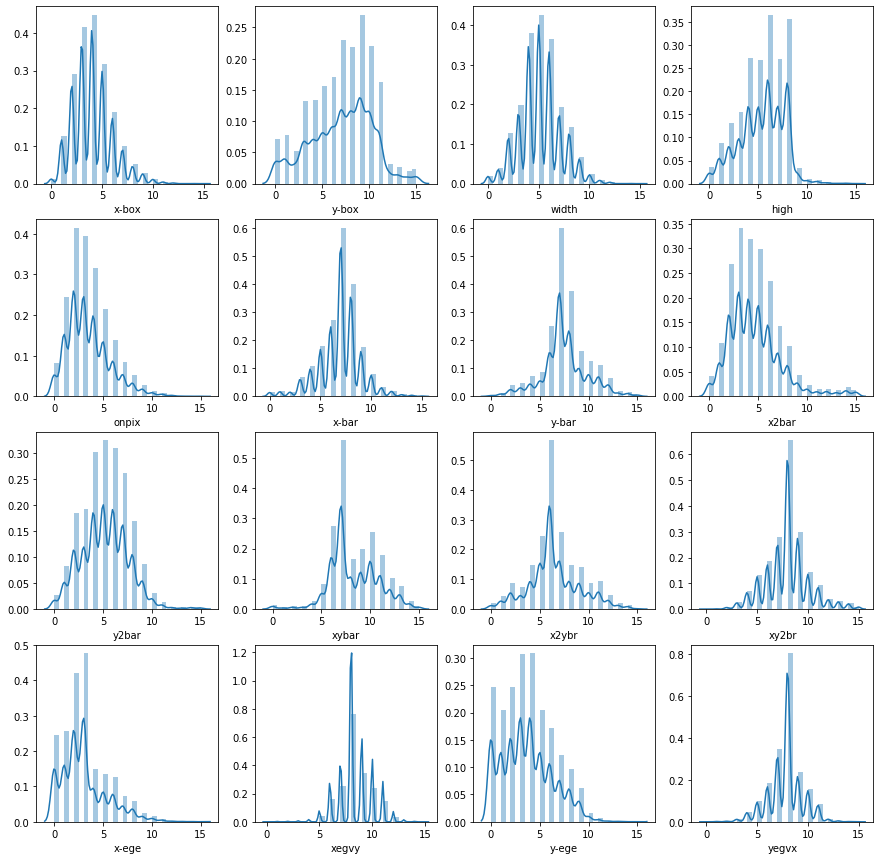

In [4]:
plt.figure(figsize=(15,15))

for i in range(1, 17):
    plt.subplot(4, 4, i)
    sns.distplot(dataset.iloc[:, i], bins=30)
    
plt.show()

In [5]:
# What letters does the dataset contain?
order = list(np.sort(dataset['lettr'].unique()))
total = list(dataset['lettr'])

freq1 = {}

for i in total:
    if i not in freq1:
        freq1[i] = 1
    else:
        freq1[i] += 1

freq = dict(sorted(freq1.items()))
perc = [i/200 for i in freq.values()]
freq_df = pd.DataFrame(freq.items(), columns=['Letter', 'Frequency'])
helllinger = "poly"
freq_df['Percentage(%)'] = perc
freq_df

,Letter,Frequency,Percentage(%)
0,A,789,3.945
1,B,766,3.830
2,C,736,3.680
3,D,805,4.025
4,E,768,3.840
5,F,775,3.875
6,G,773,3.865
7,H,734,3.670
8,I,755,3.775
9,J,747,3.735


# Data preprocessing

In [6]:
X = scale(np.array(dataset.iloc[:, 1:]))
y = np.array(dataset.iloc[:, 0])

print("X shape =", X.shape)
print("y shape =", y.shape)

X shape = (20000, 16)
y shape = (20000,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 101)

print("X_train shape =", X_train.shape,"\nX_test shape  =", X_test.shape)
print("y_train shape =", y_train.shape,"\ny_test shape  =", y_test.shape)

X_train shape = (16000, 16) 
X_test shape  = (4000, 16)
y_train shape = (16000,) 
y_test shape  = (4000,)


In [8]:
"""Taking out all unique alphabets present in dataset"""
alphabets = np.sort(np.unique(y))
alphabets

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

# Getting Markov Sampled array

In [9]:
"""Runnning markov sampling"""
temp = kms(X_train,y_train,10,1.2)
temp = np.asarray(temp)
temp.shape

(18320, 17)

In [10]:
"""Generating the new training and test set from markov sampling"""
X_train_new = temp[:,0:16]
y_train_new = temp[:,16]

# Testing KMS-SVM with different models

In [11]:
"""SVM on linear kernel"""
linearKernel = skl.svm.SVC(kernel = 'linear')
linearKernel.fit(X_train_new,y_train_new)
predOutput_linear = linearKernel.predict(X_test)
accuracy_linear = np.sum(predOutput_linear == y_test)
print("The linear kernel provides us with an accuracy of : ",accuracy_linear/len(y_test)*100,"%")

"""SVM on rbf kernel"""
rbfKernel = skl.svm.SVC(kernel = 'rbf')
rbfKernel.fit(X_train_new,y_train_new)
predOutput_rbf = rbfKernel.predict(X_test)
accuracy_rbf = np.sum(predOutput_rbf == y_test)
print("The rbf kernel provides us with an accuracy of : ",accuracy_rbf/len(y_test)*100,"%")

"""SVM on hellinger kernel"""
polyKernel = skl.svm.SVC(kernel = 'poly', C=1E01,tol=0.1)
polyKernel.fit(X_train_new,y_train_new)
predOutput_poly = polyKernel.predict(X_test)
accuracy_poly = np.sum(predOutput_poly == y_test)
print("The hellinger kernel provides us with an accuracy of : ",accuracy_poly/len(y_test)*100,"%")

"""SVM on intersection kernel"""
interKernel = skl.svm.SVC(kernel = intersection, C=1E01,tol=0.1)
X_train_new2 = np.abs(np.asarray(X_train_new,dtype='float64'))
interKernel.fit(X_train_new2,y_train_new)
X_test2 = np.abs(np.asarray(X_test,dtype='float64'))
predOutput_inter = interKernel.predict(X_test2)
accuracy_inter = np.sum(predOutput_inter == y_test)
print("The intersection kernel provides us with an accuracy of : ",accuracy_inter/len(y_test)*100,"%")

"""SVM on chi2 kernel"""
chiKernel = skl.svm.SVC(kernel = skl.metrics.pairwise.chi2_kernel, C=1E01,tol=0.1)
X_train_new2 = np.abs(np.asarray(X_train_new,dtype='float64'))
chiKernel.fit(X_train_new2,y_train_new)
X_test2 = np.abs(np.asarray(X_test,dtype='float64'))
predOutput_chi = chiKernel.predict(X_test2)
accuracy_chi = np.sum(predOutput_chi == y_test)
print("The chi^2 kernels provides us with an accuracy of : ",accuracy_chi/len(y_test)*100,"%")

The linear kernel provides us with an accuracy of :  84.0 %
The rbf kernel provides us with an accuracy of :  93.95 %
The hellinger kernel provides us with an accuracy of :  93.15 %
The intersection kernel provides us with an accuracy of :  83.3 %
The chi^2 kernels provides us with an accuracy of :  85.8 %


In [16]:
"""Accuracy array"""
acc_array = []
acc_array.append(str(1-float(accuracy_linear/len(y_test)))[:4])
acc_array.append(str(1-float(accuracy_rbf/len(y_test)))[:4])
acc_array.append(str(1-float(accuracy_poly/len(y_test)))[:4])
acc_array.append(str(1-float(accuracy_inter/len(y_test)))[:4])
acc_array.append(str(1-float(accuracy_chi/len(y_test)))[:4])


table = pd.DataFrame(columns=['Kernel', 'KPCA', 'SVDD', 'OCSVM', 'OCSSVM', 'OCSSVM with SMO', 'KMS_SVM'])
table['Kernel'] = ['Linear', 'RBF', 'Intersection', 'Hellinger', 'χ2']
table['KPCA'] = ['0.02', '0.05', '0.18', '0.01', '0.18']
table['SVDD'] = ['0.09', '0.07', '0.01', '0.02', '0.00']
table['OCSVM'] = ['0.01', '0.14', '0.04', '0.02', '0.02']
table['OCSSVM'] = ['0.07', '0.09', '0.26', '0.13', '0.18']
table['OCSSVM with SMO'] = ['0.04', '0.04', '0.22', '0.10', '0.17']
table['KMS_SVM'] = acc_array
table

,Kernel,KPCA,SVDD,OCSVM,OCSSVM,OCSSVM with SMO,KMS_SVM
0,Linear,0.02,0.09,0.01,0.07,0.04,0.16
1,RBF,0.05,0.07,0.14,0.09,0.04,0.06
2,Intersection,0.18,0.01,0.04,0.26,0.22,0.06
3,Hellinger,0.01,0.02,0.02,0.13,0.10,0.16
4,χ2,0.18,0.00,0.02,0.18,0.17,0.14


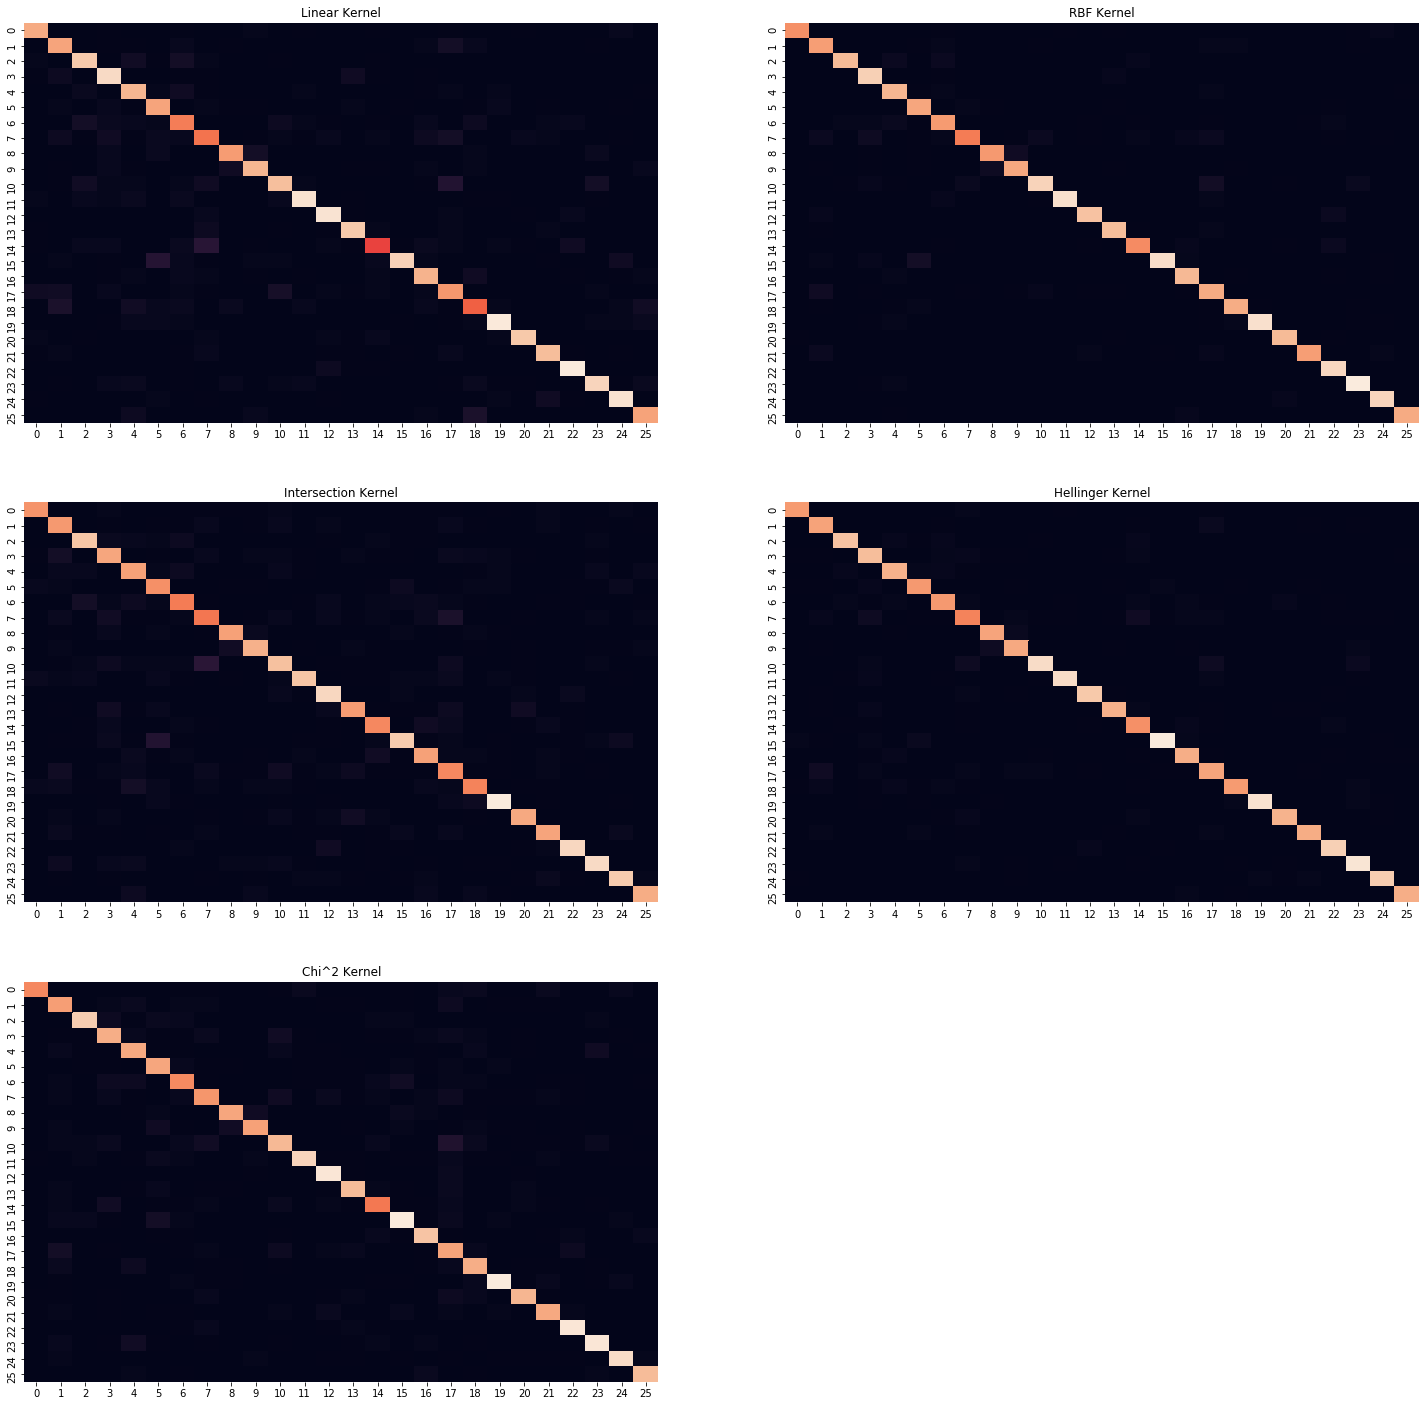

In [17]:
"""Confusion matrix"""
plt.subplots(figsize=(25,25))

plt.subplot(3,2,1)
cf_matrix = confusion_matrix(y_test, predOutput_linear)
plt.title('Linear Kernel')
sns.heatmap(cf_matrix, cbar=False)

plt.subplot(3,2,2)
cf_matrix = confusion_matrix(y_test, predOutput_rbf)
plt.title('RBF Kernel')
sns.heatmap(cf_matrix, cbar=False)

plt.subplot(3,2,3)
cf_matrix = confusion_matrix(y_test, predOutput_inter)
plt.title('Intersection Kernel')
sns.heatmap(cf_matrix, cbar=False)

plt.subplot(3,2,4)
cf_matrix = confusion_matrix(y_test, predOutput_poly)
plt.title('Hellinger Kernel')
sns.heatmap(cf_matrix, cbar=False)


plt.subplot(3,2,5)
cf_matrix = confusion_matrix(y_test, predOutput_chi)
plt.title('Chi^2 Kernel')
sns.heatmap(cf_matrix, cbar=False)


plt.show()